# Kaggle Learn - Machine Learning

Working through lessons from https://www.kaggle.com/learn/maching_learning

Keeping code from each step for reference. Planning a more streamlined analysis when complete (iowa_housing.ipynb).

In [2]:
import pandas as pd

pd.set_option('max_rows', 10)

### Table of Contents

Level 1
1. [How Models Work](#part1)<br>
2. [Starting Your ML Project](#part2)<br>
3. [Selecting and Filtering Data](#part3)<br>
4. [Your First Scikit-Learn Model](#part4)<br>
5. [Model Validation](#part5)<br>
6. [Underfitting, Overfitting and Model Optimization](#part6)<br>
7. [Random Forests](#part7)<br>
8. [Submitting from Kernel](#part8)<br>

Level 2
1. [Handling Missing Values](#l2_part1)<br>
2. [One Hot Encoding](#l2_part2)<br>
3. [XGBoost](#l2_part3)<br>
4. [Partial Dependence Plots](#l2_part4)<br>
5. [Pipelines](#l2_part5)<br>
6. [Cross-Validation](#l2_part6)<br>
7. [Data Leakage](#l2_part7)<br>

# Level 1

## Part 1: How Models Work<a class="anchor" id="part1"></a>

Course starts basic, but will ramp up quickly.

Modeling steps
* **fit** or **train** - capture patterns from data to build model
* **predict** - apply model to new data

## Part 2: Starting your ML Project<a class="anchor" id="part2"></a>

Iowa housing data available on Kaggle:
* https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data<br>

**df.describe**
* returns summary data for numerical columns <br>
    (or non-numerical colums if called on only non-numerical columns)
* count - rows with non-missing data in column

In [3]:
# Iowa data for tutorial
data = pd.read_csv('data/train.csv', index_col=0)
display(data)
data.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Part 3: Selecting and Filtering Data<a class="anchor" id="part3"></a>

For now, selecting variables to explore by intuition. Later will introduce statistical techniques for prioritizing variables.

**df.columns** - names of columns in data frame as a pandas Index object (kind of like a Series?)<br> 
**df.columns.sort_values** - columns sorted alphabetically rather than in order in datatable<br>

Selecting columns:
* **dot-notation** - like python attribute - df.column<br>
* **brackets** - like python dictiorary lookup - df[['column1', 'column2']]<br>
* **.loc** and **.iloc** - see pandas tutorial

In [4]:
data.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

In [5]:
# Summary of prices - target for predictions
data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
# Summary of squart foot by floor - potential features
data[['1stFlrSF', '2ndFlrSF']].describe()

,1stFlrSF,2ndFlrSF
count,1460.000000,1460.000000
mean,1162.626712,346.992466
std,386.587738,436.528436
min,334.000000,0.000000
25%,882.000000,0.000000
50%,1087.000000,0.000000
75%,1391.250000,728.000000
max,4692.000000,2065.000000


## Part 4: Your First Scikit-Learn Model <a class="anchor" id="part4"></a>

Choose a **prediction target** aka **outcome variable** aka **dependent variable** conventionally **y**

Choose **predictors** aka **features** aka **independent variables** conventionally **X**


In [7]:
target = 'SalePrice'
y = data.loc[:, target]

features = ['LotArea',
            'YearBuilt',
            '1stFlrSF',
            '2ndFlrSF',
            'FullBath',
            'BedroomAbvGr',
            'TotRmsAbvGrd']
X = data.loc[:, features]

display(y)
display(X)

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
1,8450,2003,856,854,2,3,8
2,9600,1976,1262,0,2,3,6
3,11250,2001,920,866,2,3,6
4,9550,1915,961,756,1,3,7
5,14260,2000,1145,1053,2,4,9
...,...,...,...,...,...,...,...
1456,7917,1999,953,694,2,3,7
1457,13175,1978,2073,0,2,3,7
1458,9042,1941,1188,1152,2,4,9


#### Training the model
* Import desired model Class from scikit-learn and initiate an instance. 
* This initial model was trained on all of data to show that this is a bad
  idea (set aside some data for [validation](#part5)).
* This initial model uses a single decision tree. More sophisticated models
  (such as [random forest](#part 7) are generally preferred. 

In [8]:
from sklearn.tree import DecisionTreeRegressor

iowa_model = DecisionTreeRegressor()
iowa_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [9]:
# Predictions
predicted_prices = iowa_model.predict(X)
print(predicted_prices - y.values) # Most predictions exactly correct
print()
print(data
      .assign(PredictedPrice = predicted_prices.astype('int')) 
      .loc[:, ['SalePrice', 'PredictedPrice']]
      .loc[data.SalePrice != predicted_prices]) # only 24 of 1460 are different
print()

# 'Average' house
#    note .values.reshape only necessiary for single row of features
print(iowa_model.predict(data.loc[:, features].mean(axis='rows')
                         .values.reshape(1, -1)))
print(data.SalePrice.mean())
print()

# 'Minimal' house
print(iowa_model.predict(data.loc[:, features].min(axis='rows')
                         .values.reshape(1, -1)))
print(data.SalePrice.min())
print()

# 'Max' house
print(iowa_model.predict(data.loc[:, features].max(axis='rows')
                         .values.reshape(1, -1)))
print(data.SalePrice.max())


[0. 0. 0. ... 0. 0. 0.]

      SalePrice  PredictedPrice
Id                             
103      118964          118911
127      128000          135875
146      130000          132500
194      130000          132500
233       94500          106250
...         ...             ...
1422     127500          133750
1423     136500          134000
1432     143750          135875
1442     149300          144433
1453     145000          146500

[24 rows x 2 columns]

[137500.]
180921.19589041095

[60000.]
34900

[755000.]
755000


## Part 5: Model Validation <a class="anchor" id="part5"></a>

**Mean Absolute Error** or **MAE**
* Average, absolute value of the difference between predicted and actual value
* Use **sklearn.metrics.mean_absolute_error**

**Validation data**
* Setting aside some data before training the model to use for testing the model
* Use **sklearn.model_selection.train_test_split**

In [10]:
# Using trainging data for validation
#   just to illustrate what a bad idea this is
from sklearn.metrics import mean_absolute_error

predicted_prices = iowa_model.predict(X)
mean_absolute_error(y, predicted_prices)

62.35433789954339

In [11]:
# Using separate training and validation sets
from sklearn.model_selection import train_test_split

rseed = 0  # Make sure to use this for categorical split as it must be the same
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=rseed)
iowa_model = DecisionTreeRegressor()
iowa_model.fit(train_X, train_y)
val_predictions = iowa_model.predict(val_X)

print(mean_absolute_error(val_y, val_predictions))

32813.75890410959


## Part 6: Underfitting, Overfitting and Model Optimization<a class="anchor" id="part6"></a>

**overfitting** - model accurately predicts training data, but does not generalize well

**underfitting** - model performs poorly even on training data, technically it may generalize well but being consistently poor

Decision tree **depth** is the length of the longest path from root to leaf. A shallow tree is prone to underfitting, but a deep tree may be overfit. Calculating the MAE for models trained over a range of depths can help identify an optional trade-off depth.

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor  

def get_mae(max_leaf_nodes, predictors_train, predictors_val, targ_train, targ_val):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=rseed)
    model.fit(predictors_train, targ_train)
    preds_val = model.predict(predictors_val)
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

# Compare MAE with differing values for max_leaf_nodes parameter
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes,
                                                                my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  35190
Max leaf nodes: 50  		 Mean Absolute Error:  27825
Max leaf nodes: 500  		 Mean Absolute Error:  32662
Max leaf nodes: 5000  		 Mean Absolute Error:  33382


## Part 7: Random Forests  <a class="anchor" id="part7"></a>

**Random forests** average predictions of many decision trees for better predictive accuracy. Tend to work well with default parameters, though other models with generally better performance exist.

In [13]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()
forest_model.fit(train_X, train_y)
iowa_predictions = forest_model.predict(val_X)
print(mean_absolute_error(val_y, iowa_predictions))

24037.48584735812


## Part 8: Submitting from a Kernel  <a class="anchor" id="part8"></a>

Information for submitting models to Kaggle competitions.
1. Download a .csv with training data<br>
2. Use this to train and validate a model<br>
3. Download a .csv of testing data (same features as training data, but<br>
   no values for the target)<br>
4. Use the model to make predictions on the testing data<br>
5. Save a two column .csv with the IDs from the test data and the predictions<br>
   (no index column)<br>
6. Submit the .csv to Kaggle<br>
   may have to do this from a Kaggle Notebook

In [14]:
#my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})
# you could use any filename. We choose submission here
# my_submission.to_csv('submission.csv', index=False)

# Level 2

## Part 1: Handling Missing Values <a class="anchor" id="l2_part1"></a>

Potential solutions:
1. Drop the columns with NaN
   * usually not the best solution, but for mostly NaN columns may make sense
   * may throw out useful features
   * problems if test set has NaN in other columns
   * dropping rows with NaN is even more dubious, may introduce sampling bias<br>
   <br> 
2. Imputation
   * Fill the missing value with some number
   * **sklearn.preprocessing.Imputer**
   * The default is to use the column mean. More sophisticated methods exist but
     are generally no better<br>
     <br>
3. Imputation plus - add a booean 'wasNaN' category for each imputed column
   * May be meaningful if NaNs are systematically above or below their column means

In [15]:
# Find columns with NaNs
nan_count_by_column = (data.isnull().sum().loc[data.isnull().sum() > 0]
                      .sort_values(ascending=False))

with pd.option_context('max_rows', 20):
    print(nan_count_by_column)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [16]:
# Using all numeric features from Iowa data
#   Ignoring catagorical data types for now for simplicity
#     will add these in next section (level2 - part2)

X_num = (data.drop(['SalePrice'], axis='columns')
             .select_dtypes(exclude=['object']))
y = data.SalePrice

X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, 
                                                            random_state=rseed)

# Function for training and evaluting each method for each NaN treatment
def score_dataset(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return mean_absolute_error(y_test, predictions)

In [17]:
# Solution 1 - drop columns with NaNs

# df.dropna(axis=1) drops all columns with NaNs, but doesn't store which columns
# instead save list of columns to drop
cols_with_nan = [col for col in X_train_num.columns 
                 if X_train_num[col].isnull().any()]
print(sorted(cols_with_nan))
X_train_reduced = X_train_num.drop(cols_with_nan, axis='columns')
X_test_reduced = X_test_num.drop(cols_with_nan, axis='columns')

# nan_count for training data should be as empty list now    
cols_with_nan_train = [col for col in X_train_reduced.columns 
                       if X_train_reduced[col].isnull().any()]
print(sorted(cols_with_nan_train))

# check if test data is also free of NaNs after dropping columns
cols_with_nan_test = [col for col in X_test_reduced.columns 
                      if X_test_reduced[col].isnull().any()]
print(sorted(cols_with_nan_test))

# train and test dropped NaN solution
mae = score_dataset(X_train_reduced, X_test_reduced, y_train, y_test)
print()
print('Mean Absolute Error from dropping columns with Missing Values: {0:.0f}'
     .format(mae))

['GarageYrBlt', 'LotFrontage', 'MasVnrArea']
[]
[]

Mean Absolute Error from dropping columns with Missing Values: 18528


In [18]:
# Solution 2 - Imputing
from sklearn.preprocessing import Imputer

# perform imputations
my_imputer = Imputer()
X_train_imputed = my_imputer.fit_transform(X_train_num)
X_test_imputed = my_imputer.transform(X_test_num)
    
# train and test with imputed data
mae = score_dataset(X_train_imputed, X_test_imputed, y_train, y_test)
print('Mean Absolute Error from imputing Missing Values: {0:.0f}'.format(mae)) 

Mean Absolute Error from imputing Missing Values: 19298


In [19]:
# Solution 3 - Imputing plus adding 'wasNaN' as a feature per imputed column

# Add columns of boolean values for 'was missing' imputed columns
X_train_plus = X_train_num.copy()
X_test_plus = X_test_num.copy()
cols_with_nan = [col for col in X_train_num.columns 
                 if X_train_num[col].isnull().any()]
for col in cols_with_nan:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_test_plus[col + '_was_missing'] = X_test_plus[col].isnull()
    
# List of added columns
print(X_train_plus.columns[X_train_plus.columns.str.contains('_was_missing')])
print()

# Perform imputations
my_imputer = Imputer()
X_train_imputed_plus = my_imputer.fit_transform(X_train_plus)
X_test_imputed_plus = my_imputer.transform(X_test_plus)
    
# train and test with imputed data
mae = score_dataset(X_train_imputed_plus, X_test_imputed_plus, y_train, y_test)
print('Mean Absolute Error from imputing plus imputed categories: '
      '{0:.0f}'.format(mae))  

Index(['LotFrontage_was_missing', 'MasVnrArea_was_missing',
       'GarageYrBlt_was_missing'],
      dtype='object')

Mean Absolute Error from imputing plus imputed categories: 19195


## Part 2: Using Categorical Data with One Hot Encoding<a class="anchor" id="l2_part2"></a>

**One-Hot Encoding:**
* Standard approach for handling categorical data 
* Generally works well for variables that don't take on a large number (roughly 15) of values.
  One way to address categories with more values is scikit-learns FeatureHasher
* Introduces new binary columns for the presence or absence of each value
* Use **pd.get_dummies** to one hot encode features
* Use **df.align** to ensure common columns between training and test sets
  

In [20]:
# View counts of values in categorical columns
for col in data.columns[data.dtypes == 'object']:
    print(col)
    print(data[col].value_counts(dropna=False))
    print()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street
Pave    1454
Grvl       6
Name: Street, dtype: int64

Alley
NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
          ... 
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, Length: 25, dtype: int64

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN    

In [21]:
# Flag columns that take greater than 15 different values
# should also flag low counts?
cat_15plus = [col for col in data.columns[data.dtypes == 'object']
              if len(data[col].value_counts(dropna=False)) >= 15]
cat_15plus

['Neighborhood', 'Exterior1st', 'Exterior2nd']

In [22]:
# Separate categorical features
y = data.loc[:, 'SalePrice']

# Using all catagorical features except those that take 15 or more values
#   eventually checkout sklearn FeatureHasher for adding these as well
#   may also want to checkout sklearn LabelEncoder 
X_cat = (data
     .drop(['SalePrice'], axis='columns')  # drop targets
     .select_dtypes(include=['object']) # drop numerical data
     .drop(cat_15plus, axis='columns')  # drop >15 value catagories
    )

# Alternatively - being more selective with features
#  still using intuitive features
#cat_features = ['LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 
#                'HouseStyle', 'Exterior1st', 'Foundation', 'GarageType' ]
#X_cat = data.loc[:, cat_features]

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y, 
                                                                random_state=rseed)

In [23]:
# Perform one-hot-encoding
X_train_encoded = pd.get_dummies(X_train_cat)
X_test_encoded = pd.get_dummies(X_test_cat)

# Align columns - ensure X_train and X_test have the same columns in order
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded,
                                                        join='inner', 
                                                        axis='columns')

# Check that encoding alignment worked
(X_train_encoded.columns == X_test_encoded.columns).all()

True

In [24]:
# Merge catageorical and numerical features
X_train_imputed_plus_df = pd.DataFrame(X_train_imputed_plus, 
                                  columns=X_train_plus.columns, 
                                  index=X_train_plus.index)

X_train_final = X_train_imputed_plus_df.merge(X_train_encoded, 
                                           right_index=True, left_index=True)

X_test_imputed_plus_df = pd.DataFrame(X_test_imputed_plus, 
                                  columns=X_test_plus.columns, 
                                  index=X_test_plus.index)

X_test_final = X_test_imputed_plus_df.merge(X_test_encoded, 
                                           right_index=True, left_index=True)

print(X_test_final.shape)

(365, 209)


In [25]:
# Sanity check
print(data.shape)
print()
print(X_train_imputed_plus.shape)
print(X_train_encoded.shape)
print(X_train_final.shape)
print()
print(X_test_imputed.shape)
print(X_test_encoded.shape)
print(X_test_final.shape)

(1460, 80)

(1095, 39)
(1095, 170)
(1095, 209)

(365, 36)
(365, 170)
(365, 209)


In [26]:
# train and test with one hot encoded categorical data and imputed plus data
mae = score_dataset(X_train_final, X_test_final, y_train, y_test)
print('Mean Absolute Error '
      '{0:.0f}'.format(mae))

# Not seeing expected improvement. Tutorial saying to expect improvement "if
# you chose the right variables". Might be overfitting. Try more carefully
# selecting features. Check weight of features in model? Maybe employ 
# regularization?

Mean Absolute Error 18072


## Part 3: Learning to Use XGBoost <a class="anchor" id="l2_part3"></a>

**XGBoost** 
* A leading model for standard tabular data (Pandas DataFrames, as opposed to more exotic types like images and videos)<br><br>
* An implementation of the **Gradient Boosted Decision Trees** algorithm<br>
  + Cycles that repeatedly build new models and combine them into an ensemble model<br>
  + Each new model targets errors of the previous ensemble model<br><br>
* Has multiple, important **tuning parameters**
  + **n_estimators** - number of cycles
    * Typical values range from 100-1000 and depend on the learning rate
    * Too low can underfit and too high can overfit<br><br>
  + **early_stopping_rounds** - stop iterating when the validation score stops improving
    * Set n_estimators high and let model stop itself
    * Uses eval_set a list of (X, y) pairs for validation<br><br> 
  + **learning_rate** aka **eta** ($\eta$) -  fraction of each new model to add to the ensemble
    * Effectively a step size toward the most accurate ensemble model
    * Smaller learning rates reduce overfitting and result in more accurate models
    * However, smaller learning rates require higher n_estimators and so are more computational expensive<br><br>
  + **n_jobs** - supports parallelization for larger data sets<br><br>
  + more parameters to learn, but these are typically most important

In [27]:
# Starting from X_train_final, X_test_final, y_train, y_test
#   (all categorical one hot encoded except features that take 15 or more values
#    and all numeric, with imputations plus boolean was imputed columns)

# xgboost lives in it's own module, but functions similarly to a sklearn-module
# sklearn also has gradient boosting regressors, but apparently they're not 
# quite as good.
from xgboost import XGBRegressor

xg_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
xg_model.fit(X_train_final, y_train, verbose=False)

predictions = xg_model.predict(X_test_final)
mae = mean_absolute_error(predictions, y_test)
print("Mean Absolute Error: {0:.0f}".format(mae))

Mean Absolute Error: 16776


In [28]:
# Experimenting with n_estimators parameter
# for n_est in [100, 300, 500, 700, 900, 1100]:
# for n_est in [119, 120, 121, 122, 123, 124]:
#for n_est in [700, 750, 800]:
for n_est in [50, 75, 100, 125, 150, 175, 200, 500, 1000]:
    xg_model = XGBRegressor(n_estimators=n_est)
    xg_model.fit(X_train_final, y_train, verbose=False)
    predictions = xg_model.predict(X_test_final)
    mae = mean_absolute_error(predictions, y_test)
    print("Mean Absolute Error with n_estimators = {0:4d}: {1:.0f}"
          .format(n_est, mae))

# Or use early_stopping to find best n_estimators
xg_model = XGBRegressor(n_estimators=1000)
xg_model.fit(X_train_final, y_train, early_stopping_rounds=5, verbose=False,
                                     eval_set=[(X_test_final, y_test)]) 
predictions = xg_model.predict(X_test_final)
mae = mean_absolute_error(predictions, y_test)
print()
print("Mean Absolute Error with early stopping best iteration = {1:.0f} "
      "was: {0:.0f}".format(mae, xg_model.best_iteration))


Mean Absolute Error with n_estimators =   50: 17505
Mean Absolute Error with n_estimators =   75: 17099
Mean Absolute Error with n_estimators =  100: 16776
Mean Absolute Error with n_estimators =  125: 16611
Mean Absolute Error with n_estimators =  150: 16460
Mean Absolute Error with n_estimators =  175: 16393
Mean Absolute Error with n_estimators =  200: 16344
Mean Absolute Error with n_estimators =  500: 16015
Mean Absolute Error with n_estimators = 1000: 15929

Mean Absolute Error with early stopping best iteration = 119 was: 16611


In [29]:
# early stopping seems to be finding at minimum much faster exploring???
# improvement after n_estimators=119 marginal / random / overfitting???

In [30]:
# Learning rate
lrs = [0.100, 0.050, 0.010]

for lr in lrs:
    xg_model = XGBRegressor(n_estimators=1000, learning_rate=lr)
    xg_model.fit(X_train_final, y_train, early_stopping_rounds=5, verbose=False,
                                         eval_set=[(X_test_final, y_test)]) 
    predictions = xg_model.predict(X_test_final)
    mae = mean_absolute_error(predictions, y_test)
    print("Mean Absolute Error with early stopping best iteration = {1:.0f} "
          "was: {0:.0f} at learning rate {2}"
          .format(mae, xg_model.best_iteration, lr))

Mean Absolute Error with early stopping best iteration = 119 was: 16611 at learning rate 0.1
Mean Absolute Error with early stopping best iteration = 137 was: 16790 at learning rate 0.05
Mean Absolute Error with early stopping best iteration = 474 was: 17552 at learning rate 0.01


In [31]:
# A little concerning that lower learning_rate gives higher mae.
#  maybe higher values are overfitting to test data 
#  

## Part 4:  Partial Dependence Plots<a class="anchor" id="l2_part4"></a>

**Partial Dependence Plots**
* Show how specific features affect model predictions, marginalizing over all other features
* Can be interpreted similarly to regression coefficients, but
  + can capture more complex patterns
  + and can be used with any model
* sklearn **plot_partial_dependence** quick plots directly from data
* sklearn **partial_dependence** returns plot data for nicer visualization with other modules
* Adjusting **grid_resolution** can help smooth out noise

In [32]:
# Gradient Boosting model for partial dependence plots
#  It appears sklearn.ensemble.plot_partial_dependence only supports a
#  BaseGradientBoosting regressor. For now retraining the model. Would be good
#  to find or code partial dependece for xgboost and other models at some point.

from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train_final, y_train)
predictions = gbr_model.predict(X_test_final)
mae = mean_absolute_error(predictions, y_test)
print("Mean Absolute Error for gradient boost model = {0}".format(mae))
print()

Mean Absolute Error for gradient boost model = 16923.427135955415



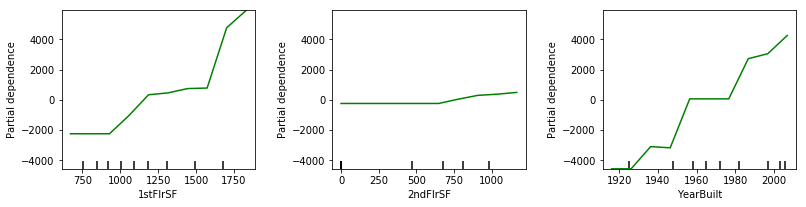

Figure(864x288)
<class 'matplotlib.figure.Figure'>


In [33]:
# Partial dependence plots
from sklearn.ensemble.partial_dependence import plot_partial_dependence
import matplotlib.pyplot as plt

# Select target features for partial dependence
pd_features = ['1stFlrSF', '2ndFlrSF', 'YearBuilt']
# Get column numbers of corresponding plots
features = [X_train_final.columns.get_loc(feature) for feature in pd_features]

# Plot
pd_plot = plot_partial_dependence(
                    gbr_model,
                    features=features, # column numbers of plots we want to show
                    X=X_train_final,  # raw predictors data.
                    feature_names=X_train_final.columns.values, # labels on graphs
                    grid_resolution=10,  # number of values to plot on x axis
                    )
pd_plot[0].set_size_inches(12, 4)
plt.show()

print(pd_plot[0])
print(type(pd_plot[0]))


In [33]:
# Partial dependence plots - take2 
#   Simpler model, less features, used to figure out plot_partial_dependence
#   in previous take

# Features
target = 'SalePrice'
y = data.loc[:, target]

features = ['LotArea',
            'YearBuilt',
            '1stFlrSF',
            '2ndFlrSF',
            'FullBath',
            'BedroomAbvGr',
            'TotRmsAbvGrd']
X = data.loc[:, features]

# Imputation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rseed)
imputer = Imputer()
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Model
gbr_model2 = GradientBoostingRegressor()
gbr_model2.fit(X_train_imputed, y_train)
predictions = gbr_model2.predict(X_test_imputed)
mae = mean_absolute_error(predictions, y_test)
print("Mean Absolute Error for gradient boost model = {0}".format(mae))
print()

Mean Absolute Error for gradient boost model = 21769.906003036485



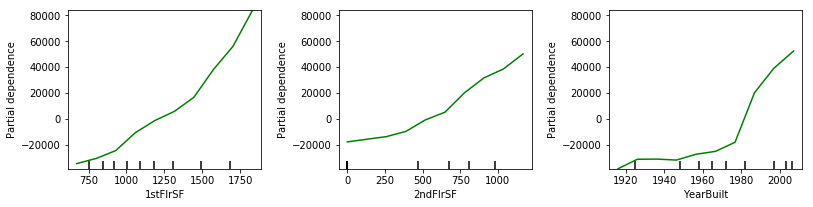

In [34]:
# Partial dependence plots
from sklearn.ensemble.partial_dependence import plot_partial_dependence
import matplotlib.pyplot as plt

# Select target features for partial dependence
pd_features = ['1stFlrSF', '2ndFlrSF', 'YearBuilt']
# Get column numbers of corresponding plots
features = [X.columns.get_loc(feature) for feature in pd_features]

# Plot
pd_plot = plot_partial_dependence(
                    gbr_model2,
                    features=features, # column numbers of plots we want to show
                    X=X_train_imputed,  # raw predictors data.
                    feature_names=X.columns.values, # labels on graphs
                    grid_resolution=10,  # number of values to plot on x axis
                    )
pd_plot[0].set_size_inches(12, 4)
plt.show()

## Part 5:  Pipelines<a class="anchor" id="l2_part5"></a>

**Pipelines**
* Improve code by bundling preprocessing and modeling
* Take any number of transformers, followed by a single model
  + **transformers** .fit then .transform (or .fittransform) - use for preprocessing
  + **models** .fit then .predict - used for predictions
* The returned output of each step is the input for next

In [35]:
# Simple pipeline
#   Using data from simple example (take two) in partial developement plots 
#   X_train, X_test, y_train, y_test

from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(Imputer(), GradientBoostingRegressor())
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

mae = mean_absolute_error(predictions, y_test)
print("Mean Absolute Error for gradient boost model = {0}".format(mae))
print()

Mean Absolute Error for gradient boost model = 21859.414801182724



In [36]:
# Looks like handling categorical data with pipelines will require a separate 
# pipeline and FeatureUnion

## Part 6: Cross-Validation<a class="anchor" id="l2_part6"></a>

**Cross-Validation**
* Use all training data for validation by splitting it into n folds and iteratively
  withholding one fold for validation while training on the rest
* Provides a more accurate measure of model quality, but take more time to run
* Smaller sample sizes benefit more, three is no simple threshold for when to use it
  + if the cross-validation scores have small standard deviation the benefit is minimal 

In [37]:
# Simple cross-validation
#   Using data and pipeline from Part5: pipelines (simple example)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
#print(scores)
print('Mean Absolute Error {0:.0f} +/- {1:.0f}'.format(-1 * scores.mean(),
                                                       scores.std()))

Mean Absolute Error 22620 +/- 840


In [38]:
# Two feature cross-validation for comparison
X2 = X.loc[:, ['LotArea', 'YearBuilt']]

scores = cross_val_score(pipeline, X2, y, cv=5, scoring='neg_mean_absolute_error')
#print(scores)
print('Mean Absolute Error {0:.0f} +/- {1:.0f}'.format(-1 * scores.mean(),
                                                       scores.std()))

Mean Absolute Error 36330 +/- 1694


In [39]:
# Cross-validation - All data model - w/ imputing and one hot encoding
#   Combining postprocessing training and test sets, a bit of a hack since 
#   they never needed to be split, but let's keep things moving for now.
#   
X3 = pd.concat([X_train_final, X_test_final])
y3 = pd.concat([y_train, y_test])

scores = cross_val_score(pipeline, X3, y3, cv=5, scoring='neg_mean_absolute_error')
print('Mean Absolute Error {0:.0f} +/- {1:.0f}'.format(-1 * scores.mean(),
                                                       scores.std()))

Mean Absolute Error 16097 +/- 1086


## Part 7 Data Leakage:  <a class="anchor" id="l2_part7"></a>

**Data Leakage**
* When information from outside the training data is used to create the model  
* Causes the model to look accurate until deployed


**Leaky Predictors**
* When the data used for model building (the train and test set data) contain information that will not be available when the model is used to make predictions in production.
  + Can happen when the data contains a feature that is updated after the target is known 
    * i.e. a feature "took_antibiotic" when the target is "got_pneumonia"

**Leaky Validation Strategies**
* When validation data affects preprocessing steps
  + If preprocessing occurs before a train_validation split 
  + When validation scores are used to select preprocessing methods, models and parameters without testing on an additional withheld data set

**Preventing leakage**
* Know your data
* Exclude any features updated after the target is realized
* Separate training data from validation data before preprocessing, even before data exploration
* Withhold a separate test sets for model selection vs. selected model evaluation
* Features that are highly correlated with the target are suspect
* Any model that is more accurate than could be anticipated likely has a leakage problem

In [40]:
# Review feature discriptions - none seem likely to be update after Sale 
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Index(['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath',
       'BedroomAbvGr', 'TotRmsAbvGrd'],
      dtype='object')

In [54]:
# Quick - doesn't seem too good to be true
print('MAE: {0:12.0f}'.format(-1 * scores.mean()))
print('Avg price: {0:6.0f}'.format(np.average(y)))

MAE:        16097
Avg price: 180921
